In [1]:
import sys
sys.path.append("..")
import grading

In [2]:
# use preloaded keras datasets and models
! mkdir -p ~/.keras/datasets
! mkdir -p ~/.keras/models
! ln -s $(realpath ../readonly/keras/datasets/*) ~/.keras/datasets/
! ln -s $(realpath ../readonly/keras/models/*) ~/.keras/models/

ln: failed to create symbolic link '/home/mariele/.keras/datasets/cifar-10-batches-py.tar.gz': File exists
ln: failed to create symbolic link '/home/mariele/.keras/datasets/mnist.npz': File exists
ln: failed to create symbolic link '/home/mariele/.keras/models/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5': File exists


In [4]:
import numpy as np
import random
from preprocessed_mnist import load_dataset
import keras
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
y_train,y_val,y_test = map(keras.utils.np_utils.to_categorical,[y_train,y_val,y_test])

labels = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],[0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],[0, 0, 0, 0, 0, 0, 1, 0, 0, 0],[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]).astype(float)

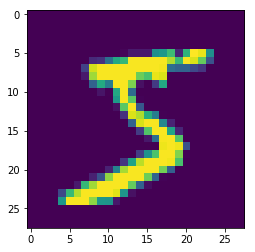

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0]);

In [6]:
import tensorflow as tf
from keras_utils import reset_tf_session
s = reset_tf_session()

In [35]:
import keras
from keras.models import Sequential
import keras.layers as ll
np.random.seed(42)

model = Sequential(name="mlp")

model.add(ll.InputLayer([28, 28]))

model.add(ll.Flatten())

# network body
l1=ll.Dense(16,name='l1')
l2=ll.Dense(16,name='l2')
l3=ll.Dense(10,name='l3',activation='softmax')
#model.add(ll.Dense(200,name='l1'))
model.add(l1)
model.add(ll.Activation('relu'))

model.add(l2)
model.add(ll.Activation('relu'))

# output layer: 10 neurons for each class with softmax
model.add(l3)

# categorical_crossentropy is your good old crossentropy
# but applied for one-hot-encoded vectors
model.compile("adam", "categorical_crossentropy", metrics=["accuracy"])

model.save_weights('model1.h5')

In [36]:
#model.summary()

Bartlett et al 1703.02930:
We  prove  new  upper  and  lower  bounds  on  the  VC-dimension  of  deep  neural  networks with  the  ReLU  activation  function.   These  bounds  are  tight  for  almost  the  entire  range of parameters.  Letting **W be the number of weights** and L be the number of layers,  we prove that the VC-dimension is O ( WL log( W )), and provide examples with VC-dimension Ω( WL log( W/L )).   This  improves  both  the  previously  known  upper  bounds  and  lower bounds. ** In terms of the number U of non-linear units, we prove a tight bound Θ( WU ) on the VC-dimension.**  All of these bounds generalize to arbitrary piecewise linear activation functions, and also hold for the pseudodimensions of these function c


It is particularly interesting to consider how the VC-dimension is affected by the various
attributes  of  the  network:   the  number **W of  parameters  (i.e.,  weights  and  biases)**,  the number
** U of non-linear units (i.e., nodes)**, and the number L of layers. 

 so the number of parameters and non-linear units is respectively given by:
#weight matrices + bias vectors of each layer:
w1 = l1.get_weights()[0]
b1 = l1.get_weights()[1]
w2 = l2.get_weights()[0]
b2 = l2.get_weights()[1]


#no of parameters each layer
p1 = w1.shape[0]*w1.shape[1]+b1.shape[0]
p2 = w2.shape[0]*w2.shape[1]+b2.shape[0]

#no of non-linear units of each layer
nu1 = w1.shape[1]
nu2 = w2.shape[1]

WU=(p1+p2)*(nu1+nu2)
WU

In [37]:
class MModelCheckpoint(keras.callbacks.Callback):
    """see https://github.com/keras-team/keras/blob/master/keras/callbacks.py#L360
    """

    def __init__(self, monitor='acc', monitor_value=0.0,period=0):
        super(MModelCheckpoint, self).__init__()
        self.monitor = monitor
        self.monitor_value = monitor_value
        self.period=period
                
    def on_train_begin(self, logs={}):
        self.losses = []
        self.accuracies = []
        self.vlosses = []
        self.norms1 = []
        self.norms2 = []
        self.norms3 = []
        self.epochs = []

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        self.period += 1
        
        if current is None:
            warnings.warn('Can save model only with %s available, '
                          'skipping.' % (self.monitor), RuntimeWarning)

        elif logs.get(self.monitor) >= self.monitor_value:
            
            self.losses.append(logs.get('loss'))
            self.accuracies.append(logs.get('acc'))
            self.norms1.append(np.linalg.norm(l1.get_weights()[0],'fro'))
            self.norms2.append(np.linalg.norm(l2.get_weights()[0],'fro'))
            self.norms3.append(np.linalg.norm(l3.get_weights()[0],'fro'))
            self.epochs.append(self.period)
           

In [39]:
def generate_data(x_train, y_train, size,shuffle_labels=False,seed=False):
    
    if seed==True:
        np.random.seed(42)
        
    ids = np.random.randint(X_train.shape[0], size=size)
    X_t = X_train[ids,:]
    
    
    
    
    
    np.random.shuffle(y_train)
    y_t0 = ys[idx]
    y_t = np.asarray([y_t0[i] if (y_t0[i]!=y_train[idx][i]).any() else [el for el in y_t0[:20] if (el != y_t0[i]).any()][0] for i in range(len(y_t0))])
    print(np.mean([np.sum((y_t==y_train[idx])[i,:])== 10 for i in range(len(y_t))]))
    return 

In [40]:
def traincb(x_train,y_train,total_size=1000,batch_size=16,tol=12,size=50,prt_rt=100,random_labels=False):
    np.random.seed(5)
    l2_norms=[]
    accs=[] 
    ys=y_train.copy()
    np.random.shuffle(ys)
    sizes=[]
    epochs=[]
    losses=[]
    
    
    accs1=[]
    l2_norms1=[]
    epochs1=[]
    losses1=[]
    
    idx = np.random.randint(X_train.shape[0], size=total_size)
    X_t = X_train[idx,:]
     
    if random_labels==False:
        y_t = y_train[idx]
    else: 
        ys=y_train.copy()
        np.random.shuffle(ys)
        y_t0 = ys[idx]
        y_t = np.asarray([y_t0[i] if (y_t0[i]!=y_train[idx][i]).any() else [el for el in y_t0[:20] if (el != y_t0[i]).any()][0] for i in range(len(y_t0))])
        print(np.mean([np.sum((y_t==y_train[idx])[i,:])== 10 for i in range(len(y_t))]))
   
    size2=size
    i=int(X_t.shape[0]/size2)-1
    n_epochs=200
    while i >=0 and i*size<=total_size: 
        #print(y_t[:(i+1)*size].shape[0])
            
        sizes.append(y_t[:(i+1)*size].shape[0])
        model.load_weights('model1.h5')
        cb = MModelCheckpoint(monitor='acc', monitor_value=0.9999)
        training = model.fit(X_t[:(i+1)*size], y_t[:(i+1)*size], 
              batch_size, epochs=n_epochs,verbose=0,callbacks=[cb]);

        if cb.epochs != []:
            #print('n.epochs since acc >= 0.5',cb.epochs[0])
            accs1.append(cb.accuracies[0])

            F11 = cb.norms1[0]
            F21 = cb.norms2[0]
            F31 = cb.norms3[0]

            l2_norm1=4*F11**2*F21**2*F31**2
            l2_norms1.append(l2_norm1)
            epochs1.append(cb.epochs[0])
            losses1.append(cb.losses[0])

        F1 =np.linalg.norm(l1.get_weights()[0],'fro')
        F2 =np.linalg.norm(l2.get_weights()[0],'fro')
        F3 =np.linalg.norm(l3.get_weights()[0],'fro')
        #print(F11[-1],F1) check!
        
        l2_norm=4*F1**2*F2**2*F3**2
        
        l2_norms.append(l2_norm)
        losses.append(training.history['loss'])
            
        accs.append(training.history['acc'][-1]) 
        #print(cb.accuracies[-1],accs[-1]) #acc check!
        losses.append(training.history['loss'])
        epochs.append(n_epochs)
    
        
        if (i+1)*size%prt_rt==0:
            print('size:',y_t[:(i+1)*size].shape[0], '  --  accu:',np.round(training.history['acc'][-1],6), 'after',n_epochs,'epochs')
        i=i-1
        size=size
 
    return np.asarray(sizes), np.asarray(accs), np.asarray(losses), np.asarray(l2_norms), np.asarray(epochs), np.asarray(accs1), np.asarray(losses1), np.asarray(l2_norms1), np.asarray(epochs1)
    

# Include val loss
we see already a (anti)correlation between weights norms and loss and weigths norms and n.epochs
now let's see how the validation loss

In [610]:
## Maybe train with decreasing size and use this to set max n. of epochs needed 

In [615]:
sizes_r, accs_r, losses_r, l2_norms_r, epcs_r, accs_r1, losses_r1, l2_norms_r1, epcs_r1 = traincb(X_train,y_train,total_size=256,size=16,prt_rt=16,random_labels=True)

0.0
size: 256   --  accu: 1.0 after 200 epochs
size: 240   --  accu: 1.0 after 200 epochs
size: 224   --  accu: 1.0 after 200 epochs
size: 208   --  accu: 1.0 after 200 epochs
size: 192   --  accu: 1.0 after 200 epochs
size: 176   --  accu: 1.0 after 200 epochs
size: 160   --  accu: 1.0 after 200 epochs
size: 144   --  accu: 1.0 after 200 epochs
size: 128   --  accu: 1.0 after 200 epochs
size: 112   --  accu: 1.0 after 200 epochs
size: 96   --  accu: 1.0 after 200 epochs
size: 80   --  accu: 1.0 after 200 epochs
size: 64   --  accu: 1.0 after 200 epochs
size: 48   --  accu: 1.0 after 200 epochs
size: 32   --  accu: 1.0 after 200 epochs
size: 16   --  accu: 1.0 after 200 epochs


In [616]:
sizes, accs, losses, l2_norms, epcs, accs_1, losses_1, l2_norms_1, epcs_1 = traincb(X_train,y_train,total_size=256,size=16,prt_rt=16,random_labels=True)

0.0
size: 256   --  accu: 1.0 after 200 epochs
size: 240   --  accu: 1.0 after 200 epochs
size: 224   --  accu: 1.0 after 200 epochs
size: 208   --  accu: 1.0 after 200 epochs
size: 192   --  accu: 1.0 after 200 epochs
size: 176   --  accu: 1.0 after 200 epochs
size: 160   --  accu: 1.0 after 200 epochs
size: 144   --  accu: 1.0 after 200 epochs
size: 128   --  accu: 1.0 after 200 epochs
size: 112   --  accu: 1.0 after 200 epochs
size: 96   --  accu: 1.0 after 200 epochs
size: 80   --  accu: 1.0 after 200 epochs
size: 64   --  accu: 1.0 after 200 epochs
size: 48   --  accu: 1.0 after 200 epochs
size: 32   --  accu: 1.0 after 200 epochs
size: 16   --  accu: 1.0 after 200 epochs


In [674]:
print(np.round(l2_norms_1[:nn]))
print(len(epcs_1)==len(epcs_r1))
print(epcs_1)
print(epcs_r1)

[2796666. 1133139. 1014379. 1210149.  905645.  458393.  609513.  439264.
  352912.  240901.  220462.  157076.  139103.   95233.   54709.   38951.]
True
[116  63  59  66  61  41  49  45  45  34  39  38  43  43  34  47]
[89 51 83 77 46 47 54 47 42 39 35 38 42 42 35 47]


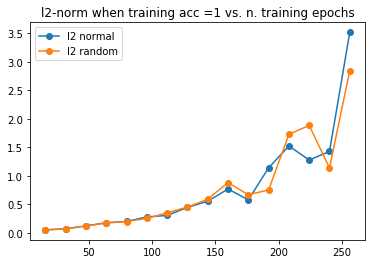

In [662]:
plt.title('l2-norm when training acc =1 vs. n. training epochs')
fac=10**(-5.9)
n0=0
nn=len(epcs_r1)
plt.plot(sizes[n0:nn],l2_norms_1[n0:nn]*fac,'o-',label='l2 normal')
plt.plot(sizes_r[n0:nn],l2_norms_r1[n0:nn]*fac,'o-',label='l2 random')

#plt.plot(sizes[n0:nn],losses_1[n0:nn],'--',label='loss normal')
#plt.plot(sizes_r[n0:nn],losses_r1[n0:nn],'--',label='loss random')
plt.legend()

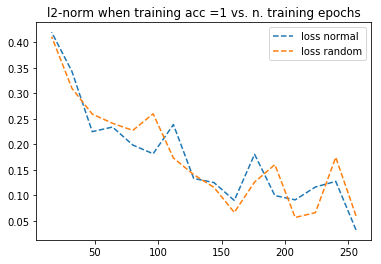

In [663]:
plt.title('l2-norm when training acc =1 vs. n. training epochs')
fac=10**(-5.9)
n0=0
nn=len(epcs_r1)
#plt.plot(sizes[n0:nn],l2_norms_1[n0:nn]*fac,'o-',label='l2 normal')
#plt.plot(sizes_r[n0:nn],l2_norms_r1[n0:nn]*fac,'o-',label='l2 random')

plt.plot(sizes[n0:nn],losses_1[n0:nn],'--',label='loss normal')
plt.plot(sizes_r[n0:nn],losses_r1[n0:nn],'--',label='loss random')
plt.legend()

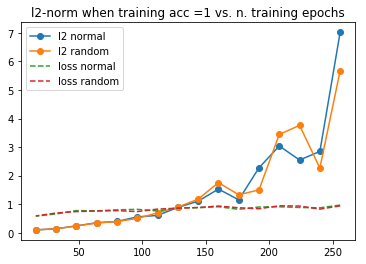

In [652]:
plt.title('l2-norm when training acc =1 vs. n. training epochs')
fac=10**(-5.6)
n0=0
nn=len(epcs_r1)
plt.plot(sizes[n0:nn],l2_norms_1[n0:nn]*fac,'o-',label='l2 normal')
plt.plot(sizes_r[n0:nn],l2_norms_r1[n0:nn]*fac,'o-',label='l2 random')

plt.plot(sizes[n0:nn],1-losses_1[n0:nn],'--',label='loss normal')
plt.plot(sizes_r[n0:nn],1-losses_r1[n0:nn],'--',label='loss random')
plt.legend()

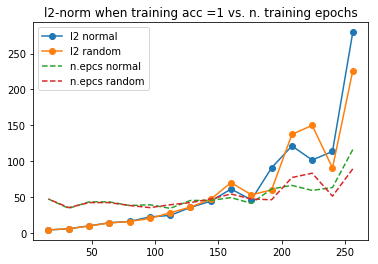

In [653]:
plt.title('l2-norm when training acc =1 vs. n. training epochs')
fac=10**(-4)
nn=len(epcs_r1)
plt.plot(sizes[:nn],l2_norms_1[:nn]*fac,'o-',label='l2 normal')
plt.plot(sizes_r[:nn],l2_norms_r1[:nn]*fac,'o-',label='l2 random')

plt.plot(sizes[:nn],epcs_1[:nn],'--',label='n.epcs normal')
plt.plot(sizes_r[:nn],epcs_r1[:nn],'--',label='n.epcs random')
plt.legend()

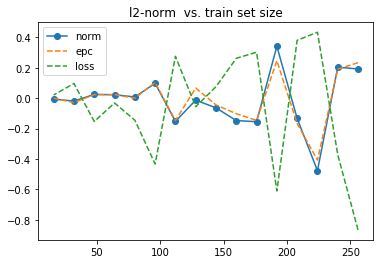

In [657]:
plt.title('l2-norm  vs. train set size')
nn=len(epcs_1)
plt.plot(sizes[:nn],1-l2_norms_r1[:nn]/l2_norms_1,'o-',label='norm')
plt.plot(sizes[:nn],1-epcs_r1[:nn]/epcs_1[:nn],'--',label='epc')
plt.plot(sizes[:nn],1-losses_r1[:nn]/losses_1[:nn],'--',label='loss')
plt.legend()

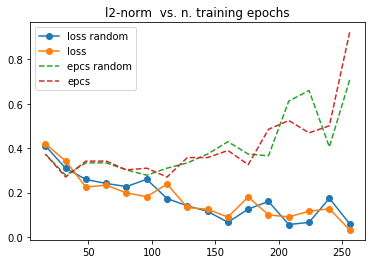

In [677]:
plt.title('l2-norm  vs. n. training epochs')
fac=10**(-2.1)
nn=len(epcs_r1)
plt.plot(sizes_r[:nn],losses_r1[:nn],'o-',label='loss random')
plt.plot(sizes_r[:nn],losses_1[:nn],'o-',label='loss')
plt.plot(sizes_r[:nn],epcs_r1[:nn]*fac,'--',label='epcs random')
plt.plot(sizes_r[:nn],epcs_1[:nn]*fac,'--',label='epcs')
plt.legend()

In [453]:
print(accs_r)
print(l2_norms_r)
print(epcs_r)

[1. 1. 1. 1. 1. 1. 1. 1.]
[  334520.21908828  1329231.12645824  2569540.06778479  6938956.48500733
  7116248.34139045 13233544.96104112 15963556.24048426  8049621.4939405 ]
[2000 2000 2000 2000 2000 2000 2000 2000]


In [466]:
print(accs_r1)
print(l2_norms_r1)
print(epcs_r1)

[1. 1. 1. 1. 1. 1. 1. 1.]
[  123032.41200108   364461.9129236    450542.99830823   816158.84396578
   903964.3169169   1420775.63498388  4827854.17482618 10693863.54473018]
[ 67  34  37  53  47  80 139 284]


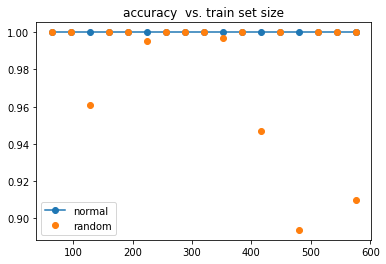

In [102]:
##### rescalesnorm=np.asarray(l2_norms_r)*10**(-8)
plt.title('accuracy  vs. train set size')
plt.plot(sizes,np.asarray(accs),'o-',label='normal')
plt.plot(sizes,np.asarray(accs_r),'o',label='random')
plt.legend()

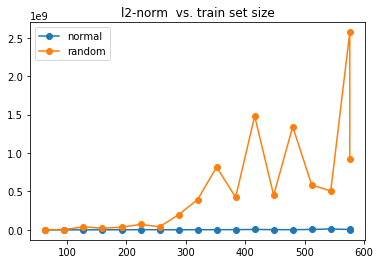

In [103]:
plt.title('l2-norm  vs. train set size')
fac=1
plt.plot(sizes,l2_norms*fac,'o-',label='normal')
plt.plot(sizes_r,l2_norms_r*fac,'o-',label='random')
#plt.plot(sizes,epcs,'--',label='n.epochs')
#plt.plot(sizes,epcs_r,'--',label='n.epochs_r')
plt.legend()

In [ ]:
def traincb(x_train,y_train,total_size=1000,batch_size=16,tol=12,size=50,prt_rt=100,random_labels=False):
    np.random.seed(5)
    l2_norms=[]
    accs=[] 
    ys=y_train.copy()
    np.random.shuffle(ys)
    sizes=[]
    epochs=[]
    losses=[]
    
    
    accs1=[]
    l2_norms1=[]
    epochs1=[]
    losses1=[]
    
    idx = np.random.randint(X_train.shape[0], size=total_size)
    X_t = X_train[idx,:]
     
    if random_labels==False:
        y_t = y_train[idx]
    else: 
        ys=y_train.copy()
        np.random.shuffle(ys)
        y_t0 = ys[idx]
        y_t = np.asarray([y_t0[i] if (y_t0[i]!=y_train[idx][i]).any() else [el for el in y_t0[:20] if (el != y_t0[i]).any()][0] for i in range(len(y_t0))])
        print(np.mean([np.sum((y_t==y_train[idx])[i,:])== 10 for i in range(len(y_t))]))
   
    size2=size
    i=int(X_t.shape[0]/size2)
    ac=0
    n_epochs=10

    while i >=0 and i*size<=total_size: 
        if len(epochs)>1:
            n_epochs=max(10,max(epochs))
            for j in range(len(epochs)-1):
               # print(epochs[j+1],epochs[:j+1])
                if epochs[j+1]>max(epochs[:j+1]):
                    print('Warning:increase epochs to ',epochs[j+1])
        
        while ac<0.9999:   
            
            sizes.append(y_t[:(i+1)*size].shape[0])
            model.load_weights('model1.h5')
            cb = MModelCheckpoint(monitor='acc', monitor_value=0.9999)
            training = model.fit(X_t[:(i+1)*size], y_t[:(i+1)*size], 
                  batch_size, epochs=n_epochs,verbose=0,callbacks=[cb]);
            
            ac=training.history['acc'][-1]
            n_epochs+=5

        if cb.epochs != []:
            #print('n.epochs since acc >= 0.5',cb.epochs[0])
            accs1.append(cb.accuracies[0])
            F11 = cb.norms1[0]
            F21 = cb.norms2[0]
            F31 = cb.norms3[0]
            l2_norm1=4*F11**2*F21**2*F31**2
            l2_norms1.append(l2_norm1)
            epochs1.append(cb.epochs[0])
            losses1.append(cb.losses[0])

            

        F1 =np.linalg.norm(l1.get_weights()[0],'fro')
        F2 =np.linalg.norm(l2.get_weights()[0],'fro')
        F3 =np.linalg.norm(l3.get_weights()[0],'fro')
        #print(F11[-1],F1) check!
        l2_norm=4*F1**2*F2**2*F3**2
        l2_norms.append(l2_norm)
        losses.append(training.history['loss'])
        accs.append(training.history['acc'][-1]) 
        #print(cb.accuracies[-1],accs[-1]) #acc check!
        losses.append(training.history['loss'])
        epochs.append(n_epochs)
        print(n_epochs,epochs)
    
        if (i+1)*size%prt_rt==0:
            print('size:',(i+1)*size, '  --  accu:',np.round(training.history['acc'][-1],6), 'after',n_epochs,'epochs')
        i=i-1
        size=size
 
    return np.asarray(sizes), np.asarray(accs), np.asarray(losses), np.asarray(l2_norms), np.asarray(epochs), np.asarray(accs1), np.asarray(losses1), np.asarray(l2_norms1), np.asarray(epochs1)
    

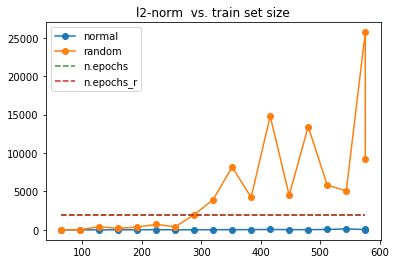

In [104]:
plt.title('l2-norm  vs. train set size')
plt.plot(sizes,l2_norms*10**(-5),'o-',label='normal')
plt.plot(sizes_r,l2_norms_r*10**(-5),'o-',label='random')
plt.plot(sizes,epcs,'--',label='n.epochs')
plt.plot(sizes,epcs_r,'--',label='n.epochs_r')
plt.legend()

In [30]:
print(sizes[5])
print(l2_norms_r[5]) 
#== 305124353.0866239
accs_r[5]

392
60522879.593511514


0.9897959183673469

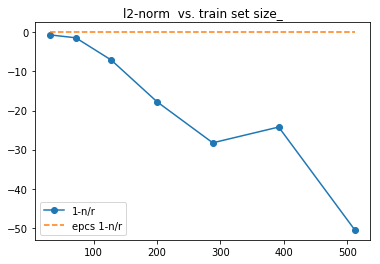

In [32]:
plt.title('l2-norm  vs. train set size_')
nn=15
plt.plot(sizes[:nn],np.asarray(1-l2_norms_r/l2_norms)[:nn],'o-',label='1-n/r')
plt.plot(sizes[:nn],np.asarray(1-epcs_r/epcs)[:nn],'--',label='epcs 1-n/r')

#plt.plot(sizes,np.asarray(l2_norms),'o-',label='normal')
#plt.plot(sizes,np.asarray(l2_norms_r),'o-',label='random')
plt.legend()

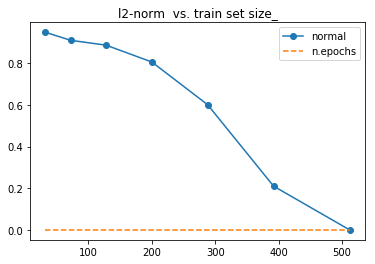

In [33]:
plt.title('l2-norm  vs. train set size_')
nn=18
plt.plot(sizes[:nn],np.asarray(1-l2_norms/np.max(l2_norms))[:nn],'o-',label='normal')
plt.plot(sizes[:nn],np.asarray(1-epcs/np.max(epcs))[:nn],'--',label='n.epochs')

plt.legend()

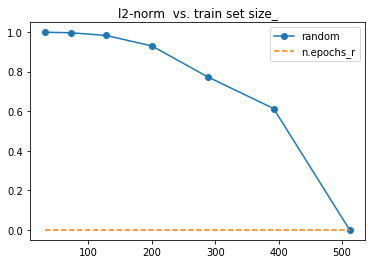

In [34]:
plt.title('l2-norm  vs. train set size_')
nn=16
plt.plot(sizes[:nn],np.asarray(1-l2_norms_r/np.max(l2_norms_r))[:nn]*10**(-0.0),'o-',label='random')
plt.plot(sizes[:nn],np.asarray(1-epcs_r/np.max(epcs_r))[:nn],'--',label='n.epochs_r')

plt.legend()

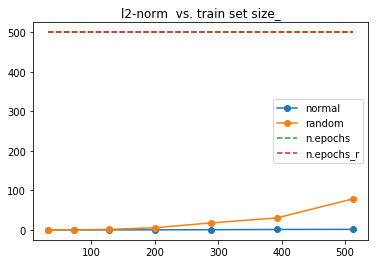

In [35]:
plt.title('l2-norm  vs. train set size_')
n0=0
nn=21
fac=10**(-6.3)
plt.plot(sizes[n0:nn],np.asarray(l2_norms)[n0:nn]*fac,'o-',label='normal')
plt.plot(sizes[n0:nn],np.asarray(l2_norms_r)[n0:nn]*fac,'o-',label='random')
plt.plot(sizes[n0:nn],np.asarray(epcs)[n0:nn],'--',label='n.epochs')
plt.plot(sizes[n0:nn],np.asarray(epcs_r)[n0:nn],'--',label='n.epochs_r')
plt.legend()

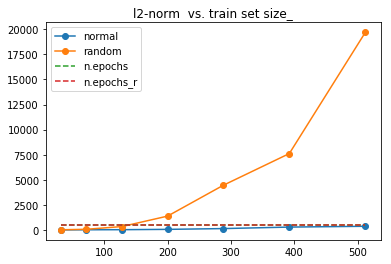

In [36]:
plt.title('l2-norm  vs. train set size_')
n0=0
nn=9
plt.plot(sizes[n0:nn],np.asarray(l2_norms)[n0:nn]*10**(-3.9),'o-',label='normal')
plt.plot(sizes[n0:nn],np.asarray(l2_norms_r)[n0:nn]*10**(-3.9),'o-',label='random')
plt.plot(sizes[n0:nn],np.asarray(epcs)[n0:nn],'--',label='n.epochs')
plt.plot(sizes[n0:nn],np.asarray(epcs_r)[n0:nn],'--',label='n.epochs_r')
plt.legend()

In [ ]:
##### list all data in history
print(training.history.keys())
# summarize history for accuracy
plt.plot(training.history['acc'])
#plt.plot(training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left') #plt.legend(['train', 'test'], loc='upper left')

plt.show()
# summarize history for loss
plt.plot(training.history['loss'])
#plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [107]:
def train(x_train,y_train,total_size=1000,batch_size=16,tol=12,size=50,prt_rt=100,random_labels=False):
    np.random.seed(5)
    l2_norms=[]
    accs=[] 
    ys=y_train.copy()
    np.random.shuffle(ys)
    sizes=[]
    epochs=[]
    losses=[]
    
    idx = np.random.randint(X_train.shape[0], size=total_size)
    X_t = X_train[idx,:]
     
    if random_labels==False:
        y_t = y_train[idx]
    else: 
        ys=y_train.copy()
        np.random.shuffle(ys)
        y_t0 = ys[idx]
        y_t = np.asarray([y_t0[i] if (y_t0[i]!=y_train[idx][i]).any() else [el for el in y_t0[:20] if (el != y_t0[i]).any()][0] for i in range(len(y_t0))])
      
        print(np.mean([np.sum((y_t==y_train[idx])[i,:])== 10 for i in range(len(y_t))]))
   
    size2=size
    i=1
    
    while i <= int(X_t.shape[0]/size2) and i*size<=total_size:
    
        sizes.append(y_t[:(i+1)*size].shape[0])
        model.load_weights('model1.h5')
        n_epochs=10
        training = model.fit(X_t[:(i+1)*size], y_t[:(i+1)*size], 
              batch_size, epochs=n_epochs,verbose=0);
        accuracies=[training.history['acc'][-1]]
        ac = accuracies[-1]
        
        if ac<1:
            stop=False
            
            while ac<1.0 and stop==False:
                #print('entered')
                if len(accuracies)>2:
                    #print('accs list len',len(accuracies))
                    #print('last acc is:',accuracies[-1],'- is it improvement over 0.9*avg over previous 2?:',np.mean(accuracies[-4:-1]))
                    if np.round(accuracies[-1],7) >= np.round(0.6*np.mean(accuracies[-4:-1]),7) and np.round(accuracies[-1],7) != np.round(np.mean(accuracies[-tol:-1]),7):
                       # print(np.round(accuracies[-1],6),np.round(np.mean(accuracies[-4:-1]),6))
                        if len(accuracies)%10==0:
                            print('improved and keep train after',n_epochs,'epochs with acc',ac, ', size',(i+1)*size)
                        training = model.fit(X_t[:(i+1)*size], y_t[:(i+1)*size], 
                              batch_size, epochs=10,verbose=0)
                
                        accuracies.append(training.history['acc'][-1])
                        ac = accuracies[-1]
                        n_epochs=n_epochs+10
                        
                    else:
                        print('no, stopped train,n. of epochs:',n_epochs,'last accs:',np.round(accuracies[-5:],7),'-size',(i+1)*size)
                        stop=True
                        
                else:
                   # print('len =',len(accuracies))
                    training = model.fit(X_t[:(i+1)*size], y_t[:(i+1)*size], 
                              batch_size, epochs=10,verbose=0)
                
                    accuracies.append(training.history['acc'][-1])
                  #  print('after append',accuracies)
                    ac = accuracies[-1]
                  #  print('last acc value', ac)
                    n_epochs=n_epochs+10
                    stop=False
               # if ac==1:
                   # print('n. of epochs=',n_epochs,'final acc:',ac)
                              
        
    
        F1 =np.linalg.norm(l1.get_weights()[0],'fro')
        F2 =np.linalg.norm(l2.get_weights()[0],'fro')
        F3 =np.linalg.norm(l3.get_weights()[0],'fro')
        l2_norm=4*F1**2*F2**2*F3**2
        l2_norms.append(l2_norm)
        accs.append(training.history['acc'][-1]) 
        losses.append(training.history['loss'])
        epochs.append(n_epochs)
        
        if (i+1)*size%prt_rt==0:
            print('size:',(i+1)*size, '  --  accu:',np.round(training.history['acc'][-1],6), 'after',n_epochs,'epochs')
        i=i+1
        size=size
        #if size%32==0:
         #   print(sizes)
            
    return np.asarray(sizes), np.asarray(accs), np.asarray(l2_norms), np.asarray(epochs)
    

In [11]:
print("\nLoss, Accuracy = ", model.evaluate(X_test, y_test))

 9568/10000 [===========================>..] - ETA: 0s
Loss, Accuracy =  [0.2864577812194824, 0.92200000000000004]


### Whoops!
So far, our model is staggeringly inefficient. There is something wrong with it. Guess, what?

In [12]:
# Test score...
test_predictions = model.predict_proba(X_test).argmax(axis=-1)
test_answers = y_test.argmax(axis=-1)

test_accuracy = np.mean(test_predictions==test_answers)

print("\nTest accuracy: {} %".format(test_accuracy*100))

assert test_accuracy>=0.92,"Logistic regression can do better!"
assert test_accuracy>=0.975,"Your network can do better!"
print("Great job!")

 7744/10000 [======================>.......] - ETA: 0s
Test accuracy: 92.2 %


AssertionError: Your network can do better!

In [2]:
answer_submitter = grading.Grader("0ybD9ZxxEeea8A6GzH-6CA")
answer_submitter.set_answer("N56DR", test_accuracy)

In [ ]:
answer_submitter.submit(<your-email>, <your-assignment-token>)

## Keras + tensorboard

Remember the interactive graphs from Tensorboard one notebook ago? 

Thing is, Keras can use tensorboard to show you a lot of useful information about the learning progress. Just take a look!

In [ ]:
! rm -r /tmp/tboard/**

In [ ]:
from keras.callbacks import TensorBoard
model.fit(X_train, y_train, validation_data=(X_val, y_val), 
          epochs=10,
          callbacks=[TensorBoard("/tmp/tboard")])

# Tips & tricks

Here are some tips on what you could do. Don't worry, to reach the passing threshold you don't need to try all the ideas listed here, feel free to stop once you reach the 0.975 accuracy mark.

 * __Network size__
   * More neurons, 
   * More layers, ([docs](https://keras.io/))

   * Nonlinearities in the hidden layers
     * tanh, relu, leaky relu, etc
   * Larger networks may take more epochs to train, so don't discard your net just because it could didn't beat the baseline in 5 epochs.


 * __Early Stopping__
   * Training for 100 epochs regardless of anything is probably a bad idea.
   * Some networks converge over 5 epochs, others - over 500.
   * Way to go: stop when validation score is 10 iterations past maximum
     

 * __Faster optimization__
   * rmsprop, nesterov_momentum, adam, adagrad and so on.
     * Converge faster and sometimes reach better optima
     * It might make sense to tweak learning rate/momentum, other learning parameters, batch size and number of epochs


 * __Regularize__ to prevent overfitting
   * Add some L2 weight norm to the loss function, theano will do the rest
     * Can be done manually or via - https://keras.io/regularizers/
   
   
 * __Data augmemntation__ - getting 5x as large dataset for free is a great deal
   * https://keras.io/preprocessing/image/
   * Zoom-in+slice = move
   * Rotate+zoom(to remove black stripes)
   * any other perturbations
   * Simple way to do that (if you have PIL/Image): 
     * ```from scipy.misc import imrotate,imresize```
     * and a few slicing
   * Stay realistic. There's usually no point in flipping dogs upside down as that is not the way you usually see them.